<a href="https://colab.research.google.com/github/Sabrish19/vechical-routing/blob/main/vehile_routing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 20 # Define the number of locations (eg 10)

locations = [(random.randint(0,100),random.randint(0,100))for _ in range(num_locations)]

depot = (50,50)

num_vehicles = 3

In [ ]:
# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",  tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evalVrp(individual):
  total_distance = 0
  distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
  for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        for k in range(len(vehicle_route) - 1):
            vehicle_distance += np.linalg.norm(np.array(vehicle_route[k]) - np.array(vehicle_route[k + 1]))


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

  balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
  return total_distance, balance_penalty

toolbox.register("evaluate", evalVrp)


In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
        plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title('Vehical routes')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	607.677	1.28688
1  	213   	585.023	1.07218
2  	243   	584.687	3.88855
3  	232   	570.888	1.72832
4  	233   	565.664	3.67363
5  	218   	562.961	3.67363
6  	213   	555.35 	4.14913
7  	233   	543.474	2.38763
8  	219   	539.93 	3.28985
9  	209   	527.187	3.27546
10 	224   	517.931	2.98662
11 	230   	517.058	1.28859
12 	230   	505.4  	2.06822
13 	217   	480.197	2.06822
14 	231   	449.009	2.06822
15 	250   	414.37 	2.06822
16 	238   	389.731	2.49253
17 	236   	380.258	2.49253
18 	225   	373.234	2.97611
19 	225   	363.133	2.97611
20 	209   	356.227	4.39462
21 	232   	350.89 	5.14952
22 	237   	348.245	8.75339
23 	217   	346.13 	4.40275
24 	227   	342.588	2.32149
25 	246   	342.573	6.26546
26 	233   	335.064	10.8444
27 	219   	332.704	8.84851
28 	229   	329.593	10.2731
29 	223   	327.948	5.6242 
30 	238   	326.723	2.07379
31 	225   	325.689	13.2735
32 	221   	325.945	1.97255
33 	243   	317.396	6.32332
34 	232   	313.148	4.61903
35 	244   	308.671	4.7516 
3

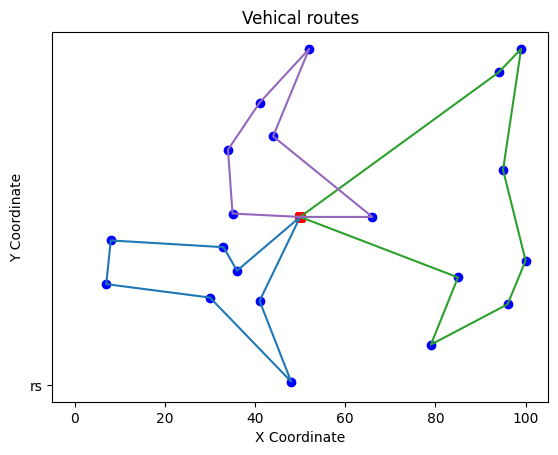

In [ ]:
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
   main()